In [4]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [10]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [27]:
from tensorflow.keras.utils import to_categorical
y_train =  to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [31]:
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train  = y_train[1000:]

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.9404 - accuracy: 0.4653 - val_loss: 1.9891 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.6347 - accuracy: 0.6625 - val_loss: 1.4132 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.2096 - accuracy: 0.7457 - val_loss: 1.1956 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.9805 - accuracy: 0.7929 - val_loss: 1.0769 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8147 - accuracy: 0.8260 - val_loss: 1.0209 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.6884 - accuracy: 0.8515 - val_loss: 0.9407 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5776 - accuracy: 0.8757 - val_loss: 0.9029 - val_accuracy: 0.8010
Epoch 8/20
16

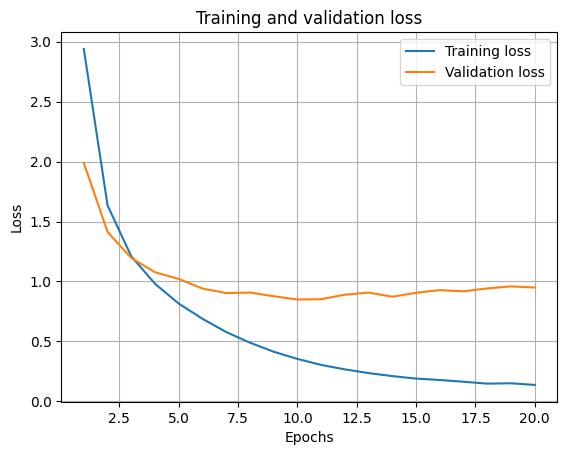

In [36]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid()
plt.legend();

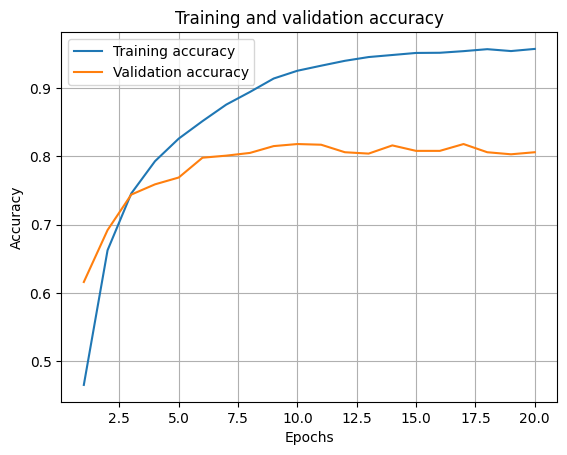

In [37]:
val_acc = history.history["val_accuracy"]
acc = history.history["accuracy"]
plt.plot(epochs,acc,label="Training accuracy")
plt.plot(epochs,val_acc,label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid();